#### **Models of Neural Systems, WS 2019/20**

**Project 2: Action potential propagation**

Contributors: Luke, Andrey, Roopa

**1. Numerically solve the cable equation (equation 1) when injecting a steady depolarizing
current halfway along the cable. Consider that the membrane is passive,
i.e. $ i_m = \frac{(V - E_L)}{r_m} $, where $r_m$ is the specific membrane resistance. Take
$r_m = 20 k \Omega cm^2$, $r_L = 200 \Omega cm$, $c_m = 1 \mu F/cm^2$, and cable radius $a = 2 \mu m$.
Compare the solution to the analytical solution of the infinite cable.**

#### CABLE EQUATION

In [1]:
def cable(V0,t0,tmax,i_t,stepSize, **kwargs):
    #when dV/dt = 0
    dV_dx = np.divide(np.dot((kwargs["i_m"] - kwargs["i_e"]),np.power(kwargs["a"],2)), (2*kwargs["a"]*kwargs["r_L"]))
    return dV_dx

#### EULER

In [2]:
def euler_2order(f_func, X, t0, tmax, stepSize,**kwargs):
    X = np.atleast_2d(X)
    ndim = X.ndim
    Y = np.expand_dims(X, axis=ndim)
    T = np.linspace(t0,tmax, int(tmax/stepSize)+1)
    for i_t, t in tqdm(enumerate(T)):
        if i_t == 0:
            continue
        elif i_t > 0:
            dV_dx2 = f_func(X,t0,tmax,i_t,stepSize, **kwargs)
            X = X + np.dot(dV_dx2,(stepSize))
            Y = np.concatenate([Y, X[...,None]], axis=ndim)
    return Y,T

In [8]:
import numpy as np
from tqdm import tqdm

#question 1
#solve for only half! We start in the middle, and the axon is symmetric.

#initial values
V0 = -70 #mV, set arbitrarily (needs to be close to Vrest to use linear approximation)
L = 0.5 #meter - because only need to solve half of (1m-long) axon
dx = 2*(10**-4) #200 micrometers
dt = 1*(10**-5) #0.01 ms
z = 0.5

#more variables
i_e = np.full_like(V0,-50 * (10**-12)) #pA
E_L = -65 * (10**-3) #resting potential
r_m = 20 * (10**3) * (10**-4) #SI units
r_L = 200 * (10**-2) #SI units
i_m = np.divide((V0 - E_L),r_m) #gives array size of V0 (size of length of num of compartments)
a = 2*(10**-6)#radius of cable

#calc remaining required variables
nodes = int(L/dx)+1
L_vec = np.linspace(0,L,nodes) #nodes along axon
V0_vec = np.full_like(L_vec, V0) #initial conditions: all Vs = V0

#inject current
def inject(x, i_m,r_m):
    x[0] = x[0] + i_m*r_m
    return x

V0_vec = inject(V0_vec, i_m,r_m)

#print("V0",V0_vec)

#euler 2nd order ODE
Y,T = euler_2order(cable, V0_vec, 0, L, dx, i_m=i_m,i_e=i_e,a=a,r_L=r_L)
#print(Y,T)

2501it [00:45, 55.30it/s] 


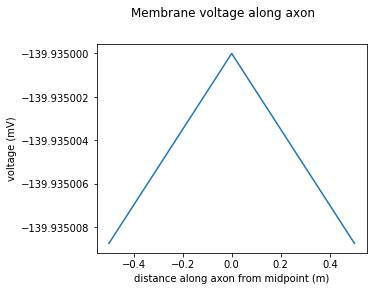

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#PLOT
plt.rcParams["figure.figsize"] = [5,4]
plt.plot(list(reversed(-T[1:]))+list(T),list(reversed(Y[0,0,1:]))+list(Y[0,0,:]))
plt.xlabel('distance along axon from midpoint (m)')
plt.ylabel('voltage (mV)')
plt.ticklabel_format(useOffset=False)
plt.subplots_adjust(left=0.15, top=0.85)
plt.suptitle("Membrane voltage along axon")
plt.show()

**2. Implement the Hodgkin-Huxley model of action potential propagation in the
squid giant axon. Solve the partial differential equation using the Crank-Nicholson
method (see e.g. Chapters 5.5, 5.6 and 6.6B from Dayan and Abbott, 2001). Take
$a = 238 \mu m$ and $r_L = 35.4 \Omega cm$. Note that you will need to include your
code with the project report!**

**3. Initiate an action potential on one end of the axon by injecting a current in the
terminal compartment.**

**4. Determine the action potential propagation velocity as a function of the axon
radius.**

**5. Initiate action potentials at both ends of the axon. Show that they annihilate
when they collide.**

**6. Simulate action potential propagation in a myelinated axon (see e.g. Chapter 6.4
from Dayan and Abbott, 2001). Consider that the nodes of Ranvier (the unmyelinated
spaces) are $2 \mu m$ long and are located at 1 mm intervals along the axon.
Also consider that myelin increases the resistance across the cell membrane by
a factor of 5,000 and decreases the capacitance by a factor of 50.**